# Task 1: Edge detection using co-occurrence matrices

**Imports**

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

**Reading the sample image** 

In [4]:
image = (Image.open("/content/drive/MyDrive/Colab Notebooks/sample_image.jpg")).convert("L")

**A function that takes an image and return an array representation of the image and an array representation of the image squared**

In [5]:
def toArrayAndSquare(im):
    img = [[0 for _ in range(im.size[0])] for _ in range(im.size[1])]
    sqr = [[0 for _ in range(im.size[0])] for _ in range(im.size[1])]
    for i in range(0, im.size[0]):
        for j in range(0, im.size[1]):
            img[j][i] = im.getpixel((i, j))
            sqr[j][i] = img[j][i]**2
    return img, sqr

**A function that calculate the N/S and W/E co-occurrence matrices of an image**

In [6]:
def calculateCooccurrence():
    img, _ = toArrayAndSquare(image)
    horizontal = [[0] * 256 for _ in range(256)]
    vertical = [[0] * 256 for _ in range(256)]
    for x in range(len(img) - 1):
        for y in range(len(img[0]) - 1):
            i = img[x][y]
            j = img[x][y + 1]
            z = img[x + 1][y]
            horizontal[i][z] += 1
            vertical[i][j] += 1
    return vertical, horizontal

**A function that takes a matrix and nullifies it**

In [7]:
def nullifyPixels(matrix):
    res = [[0 for _ in range(len(matrix[0]))] for _ in range(len(matrix))]
    for x in range(len(matrix)):
        for y in range(len(matrix[0])):
            if abs(x - y) < 30:
                res[x][y] = 0
            else:
                res[x][y] = matrix[x][y]
    return res

**A function that takes two co-occurence matrices and return an image**

In [8]:
def imgWithCooccurrence(v_matrix_null, h_matrix_null):
    result = Image.new('L', (image.size[0], image.size[1]))
    for x in range(image.size[0] - 1):
        for y in range(image.size[1] - 1):
            i = image.getpixel((x, y))
            j = image.getpixel((x, y + 1))
            z = image.getpixel((x + 1, y))
            if v_matrix_null[i][z] != 0 or h_matrix_null[i][j] != 0:
                result.putpixel((x, y), 255)
    return result


**Output images**

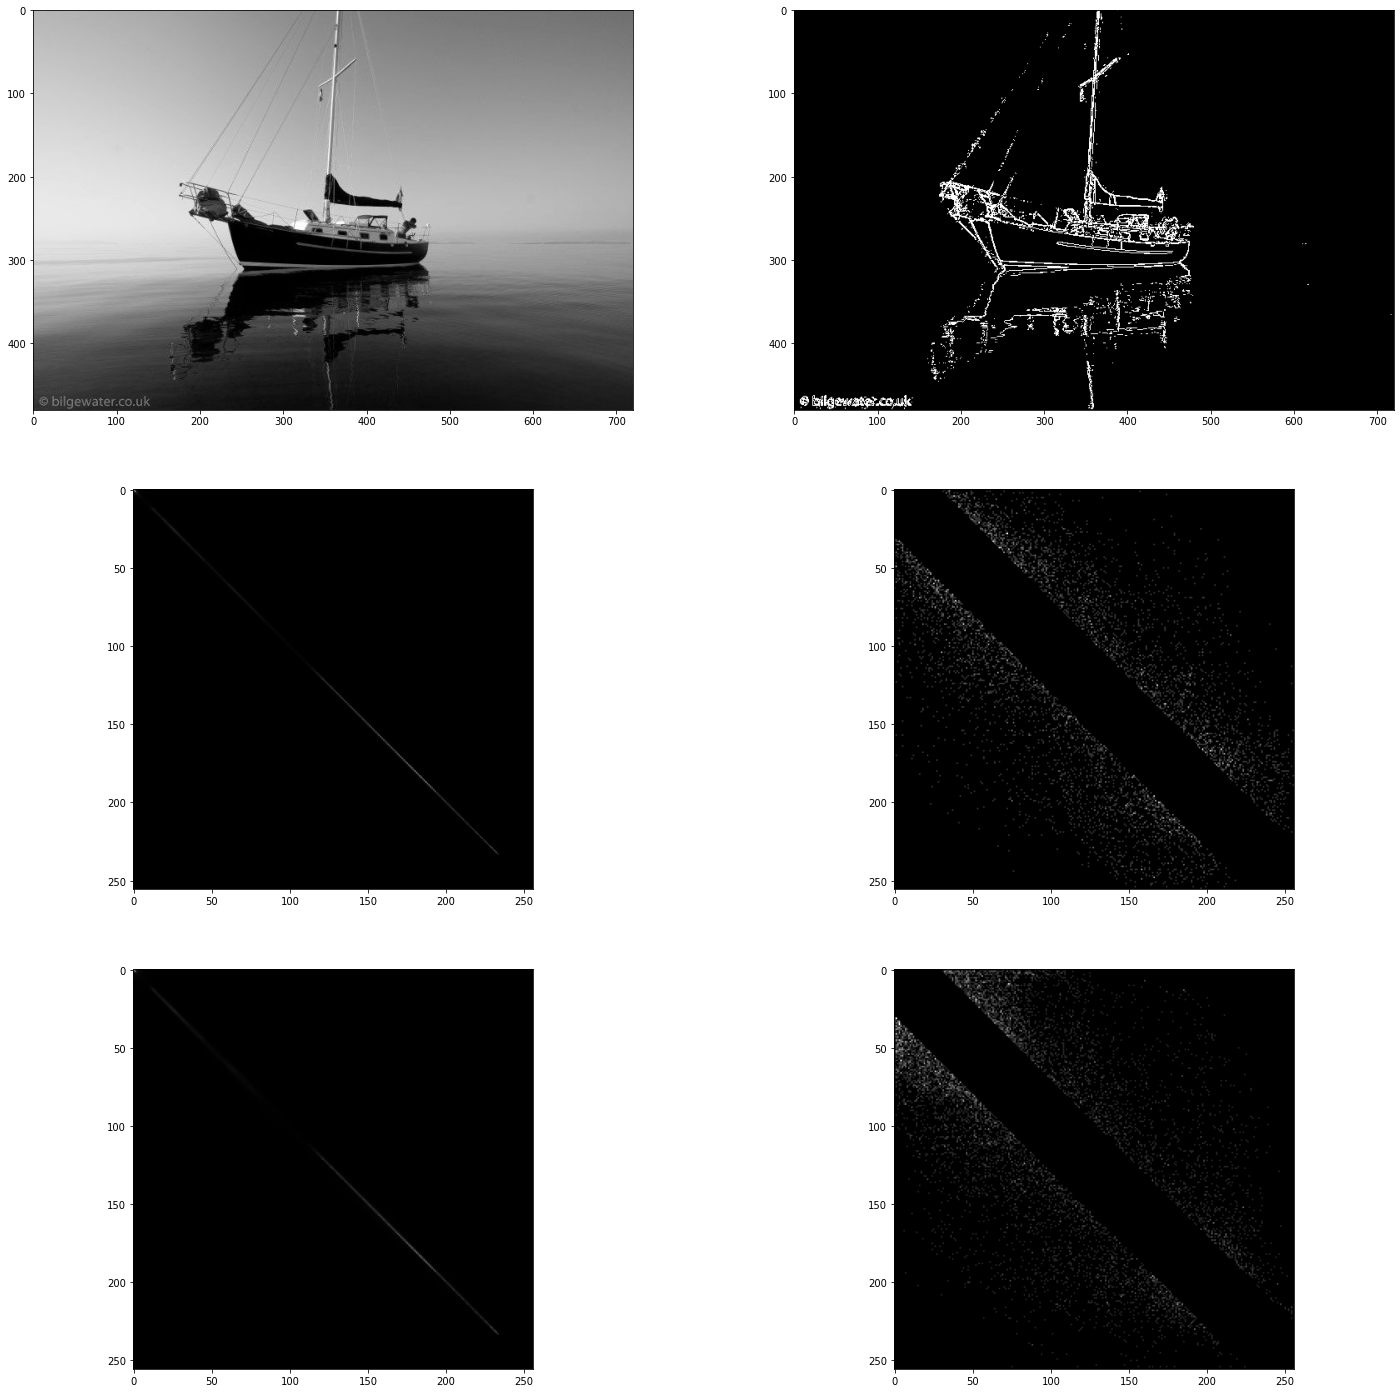

In [9]:
v_matrix, h_matrix = calculateCooccurrence()
v_matrix_null = nullifyPixels(v_matrix)
h_matrix_null = nullifyPixels(h_matrix)
res_image = imgWithCooccurrence(v_matrix_null, h_matrix_null)

plt.subplots(nrows=3, ncols=2, figsize=(25, 25))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(3, 2, 2)
plt.imshow(res_image, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(v_matrix, cmap='gray')

plt.subplot(3, 2, 4)
plt.imshow(v_matrix_null, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(h_matrix, cmap='gray')

plt.subplot(3, 2, 6)
plt.imshow(h_matrix_null, cmap='gray')
plt.show()

# Task 2: Edge detection using Integral images

**A function that takes an image and return an array representation of the image and an array representation of the image squared**

In [10]:
def toArrayAndSquare(im):
    img = [[0 for _ in range(im.size[0])] for _ in range(im.size[1])]
    sqr = [[0 for _ in range(im.size[0])] for _ in range(im.size[1])]
    for i in range(0, im.size[0]):
        for j in range(0, im.size[1]):
            img[j][i] = im.getpixel((i, j))
            sqr[j][i] = img[j][i]**2
    return img, sqr

**A function that takes an image and a threshold value and applies a threshold to the image**

In [11]:
def applyThreshold(im, th):
    res = [[0 for _ in range(len(im[0]))] for _ in range(len(im))]
    for i in range(0, len(im)):
        for j in range(0, len(im[0])):
            if im[i][j] < th:
                res[i][j] = 0
            else:
                res[i][j] = 255
    return res

**A function that takes an image and return its integral image**

In [12]:
def integralArray(img):
    # 𝑠(𝑖,𝑗) = 𝑠(𝑖,𝑗−1) + 𝑓(𝑖,𝑗)
    # 𝑖𝑖(𝑖,𝑗) = 𝑖𝑖(𝑖−1,𝑗) + 𝑠(𝑖,𝑗)
    s = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]
    ii = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]
    for x in range(len(img)):
        for y in range(len(img[0])):
            if y == 0:
                s[x][y] = img[x][y]
            else:
                s[x][y] = s[x][y - 1] + img[x][y]
    for x in range(len(img)):
        for y in range(len(img[0])):
            if x == 0:
                ii[x][y] = s[x][y]
            else:
                ii[x][y] = ii[x - 1][y] + s[x][y]
    return ii

**A function that calculates the local sum of a specific window of an image**

In [13]:
def localSum(img, top_left, bottom_right):
    total = 0
    window_size_x = bottom_right[0] - top_left[0] + 1
    window_size_y = bottom_right[1] - top_left[1] + 1
    total += img[bottom_right[0]][bottom_right[1]] + img[top_left[0] - 1][top_left[1] - 1] - \
        img[bottom_right[0]][bottom_right[1] - window_size_y] - img[bottom_right[0] - window_size_x][bottom_right[1]]
    return total

**A function that tahes detect edges in the image by calculating variance values using integral images**

In [14]:
def imgWithIntegral(img, window_size):
    original_img, squared_img = toArrayAndSquare(img)
    integral_img = integralArray(original_img)
    integral_sqr = integralArray(squared_img)
    total = window_size[0] * window_size[1]
    starting_x = window_size[0]//2
    starting_y = window_size[1]//2
    res_img = [[0 for _ in range(img.size[0])] for _ in range(img.size[1])]
    for i in range(starting_x, img.size[0] - starting_x):
        for j in range(starting_y, img.size[1] - starting_y):
            sum_integral = localSum(integral_img, (j - starting_y, i - starting_x), (j + starting_y, i + starting_x))
            sum_squared = localSum(integral_sqr, (j - starting_y, i - starting_x), (j + starting_y, i + starting_x))
            variance = ((1/total) * sum_squared) - ((1/total) * sum_integral)**2
            if variance < 0:
                variance = 0
            res_img[j][i] = variance
    return res_img

**Output Images**

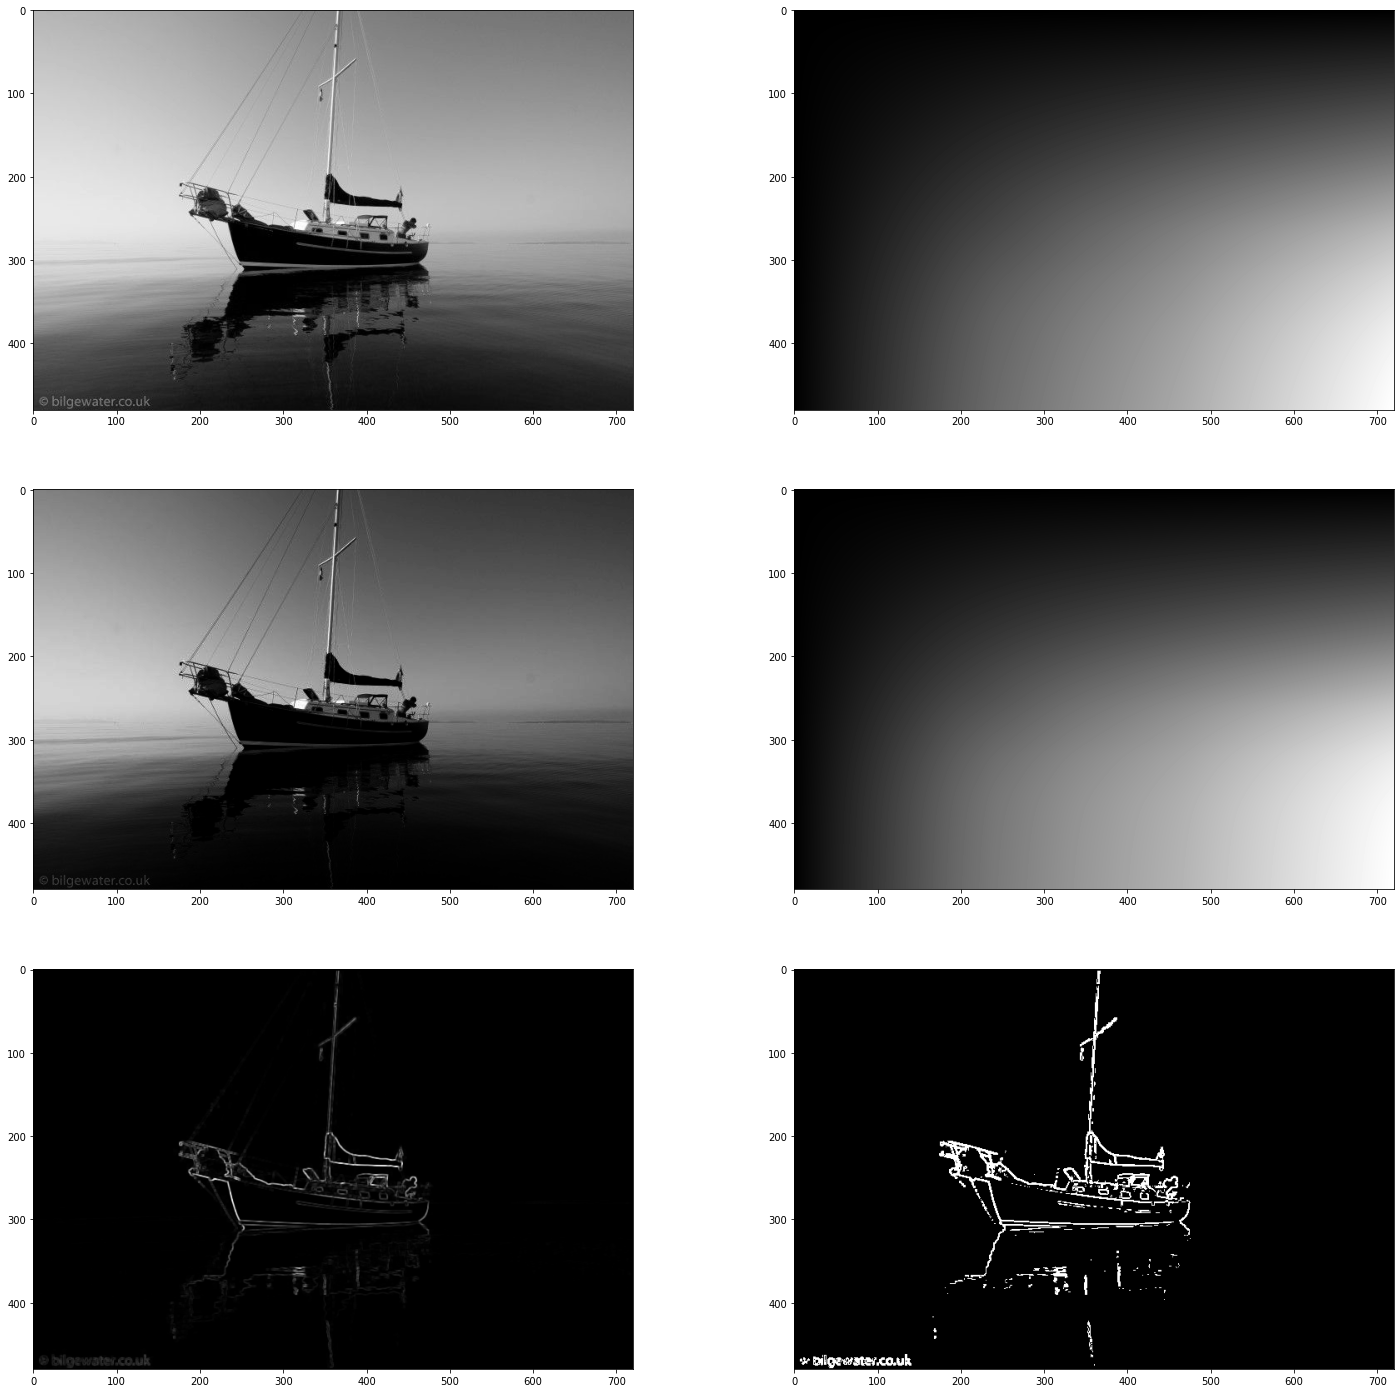

In [15]:
img_array, squared_img_array = toArrayAndSquare(image)

integral_img = integralArray(img_array)

integral_img_squared = integralArray(squared_img_array)

result_img = imgWithIntegral(image, (3, 3))

result_img_threshold = applyThreshold(result_img, 750)

plt.subplots(nrows=3, ncols=2, figsize=(25, 25))
plt.subplot(3, 2, 1)
plt.imshow(img_array, cmap='gray')

plt.subplot(3, 2, 2)
plt.imshow(integral_img, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(squared_img_array, cmap='gray')

plt.subplot(3, 2, 4)
plt.imshow(integral_img_squared, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(result_img, cmap='gray')

plt.subplot(3, 2, 6)
plt.imshow(result_img_threshold, cmap='gray')
plt.show()


# Comments:

***The Following two sections will discuss the performance of both tasks and general observations about the outputs.***

# Task 1:


1. Detecting edges using the co-occurance matrices method took 1.6235 seconds on average to process the sample image supplied (The average was calculated by running the script on the sample image for five times and averaging the runtime of these runs).
2. The quality of the output image is acceptable and it caught the reflection of the boat in the water and some of the robes connected to the sail, but, the output is also not very clear and the lines are ragged and not clean, it appears as if the image is noisey.

3. The value that is used to nullify will be different for each image and in order to output the best result, a lot of trials will be needed to calculate the optimal value, which is not very effecient.

# Task 2:

1. Detecting edges using the integral images method took 2.3775 seconds on average to process the sample image supplied (The average was calculated by running the script on the sample image for five times and averaging the runtime of these runs).

2. The quality of the output image looks good in general, but, it did not catch most of the reflections in the water and the sail robes are not detected at all. the output without thresholding is unusable, very dark and has little to no contrast. So thresholding is needed in order to have an acceptable output.

3. The value that is used in the thresholding function will be different for each image and in order to output the best result, a lot of trials will be needed to calculate the optimal value, which is not very effecient.

4. During my trials on the sample image, increasing the window size had no apparent effect the runtime, but, by increasing the window size the details in the output image decreased. 